In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [5]:
# Step 1: Load the dataset
path = "SMSSpamCollection"
df = pd.read_csv(path, sep='\t', header=None, names=['Label', 'Message'])

In [122]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [123]:
# Step 2: Explore the dataset
print(df.head())
print("Dataset size:", df.shape)
print("\nClass distribution:\n", df['Label'].value_counts())

  Label                                            Message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
Dataset size: (5572, 2)

Class distribution:
 Label
ham     4825
spam     747
Name: count, dtype: int64


In [124]:
# Step 3: Preprocessing
# Convert labels to binary values: 'spam' -> 1, 'ham' -> 0
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})

C:\Users\rakes\AppData\Local\Temp\ipykernel_10764\1629885746.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Label', palette='viridis')


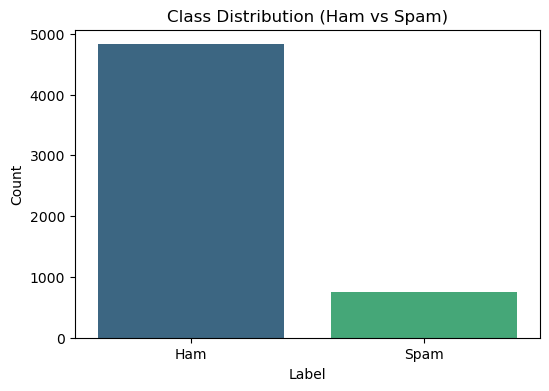

In [125]:
# Step 4: EDA and Visualization
# 4.1 Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Label', palette='viridis')
plt.title('Class Distribution (Ham vs Spam)')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.ylabel('Count')
plt.show()

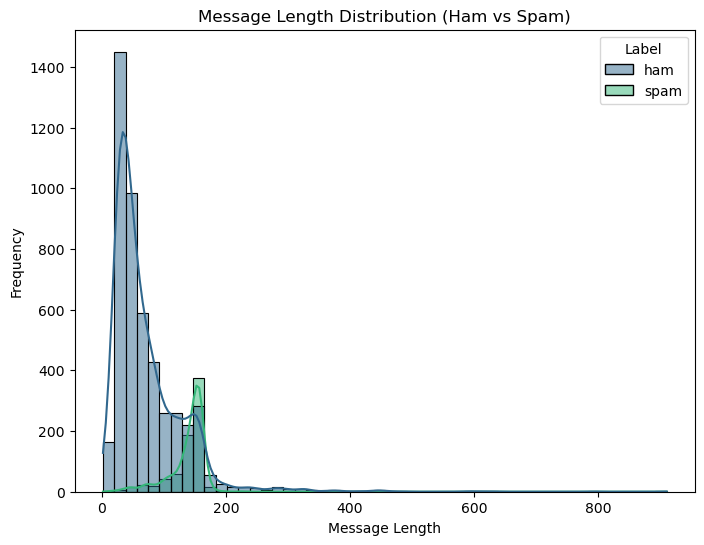

In [7]:
# 4.2 Message length distribution
df['Message Length'] = df['Message'].apply(len)

plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Message Length', hue='Label', bins=50, kde=True, palette='viridis')
plt.title('Message Length Distribution (Ham vs Spam)')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()



In [9]:
# 4.3 Word frequency visualization (Top 20 words in spam and ham)
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['Message'])
feature_names = vectorizer.get_feature_names_out()

# Convert X to DataFrame for visualization
X_df = pd.DataFrame(X.toarray(), columns=feature_names)
spam_words = X_df[df['Label'] == 1].sum().sort_values(ascending=False).head(20)
ham_words = X_df[df['Label'] == 0].sum().sort_values(ascending=False).head(20)


In [15]:
# print(X)

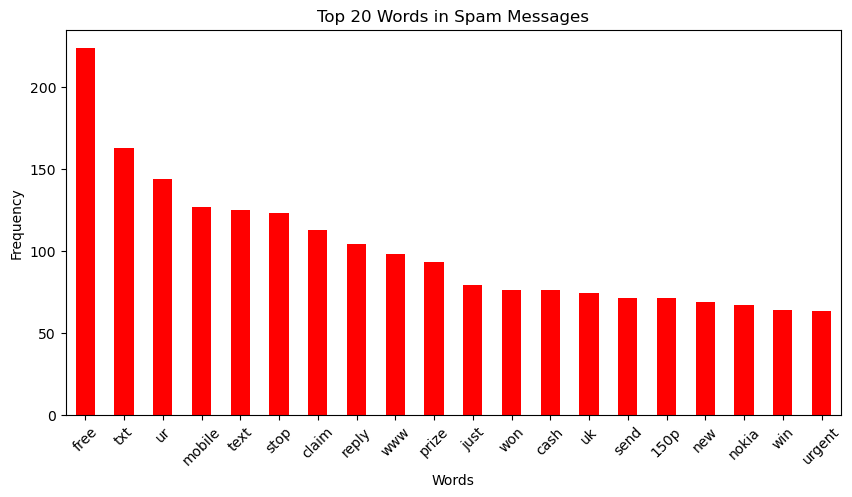

In [128]:
# Spam word cloud
plt.figure(figsize=(10, 5))
spam_words.plot(kind='bar', color='red')
plt.title('Top 20 Words in Spam Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

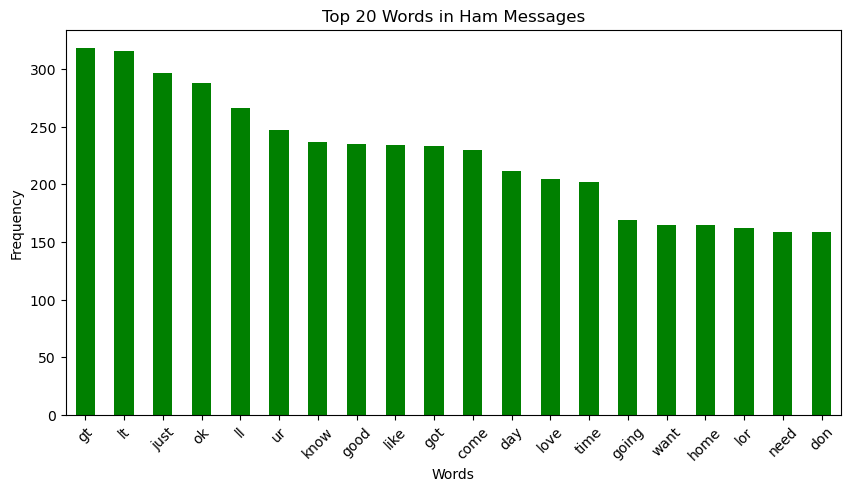

In [129]:
# Ham word cloud
plt.figure(figsize=(10, 5))
ham_words.plot(kind='bar', color='green')
plt.title('Top 20 Words in Ham Messages')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [19]:
# Step 5: Split the dataset into training and testing sets
X = df['Message']  # Features (SMS text)
y = df['Label']    # Target (spam or ham)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [21]:
# Step 6: Convert text to numeric data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [23]:
# Step 7: Train the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

MultinomialNB()

In [25]:
# Step 8: Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

In [27]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9885139985642498
Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1207
        spam       0.98      0.94      0.96       186

    accuracy                           0.99      1393
   macro avg       0.98      0.97      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [33]:
# Step 10: Test with a custom message
custom_message = ["Hurray won 1 million cash prize"]
custom_message_vectorized = vectorizer.transform(custom_message)
prediction = model.predict(custom_message_vectorized)

if prediction[0] == 1:
    print("The message is SPAM.")
else:
    print("The message is NOT SPAM.")

The message is NOT SPAM.


### Using over sampling - SMOTE

In [45]:
# synthetic minority oversampling technique
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [47]:
# Step 1: Load the dataset
url = "SMSSpamCollection"
df = pd.read_csv(url, sep='\t', header=None, names=['Label', 'Message'])

In [49]:
# Step 2: Preprocessing
# Convert labels to binary values: 'spam' -> 1, 'ham' -> 0
df['Label'] = df['Label'].map({'ham': 0, 'spam': 1})

# Split into features (X) and target (y)
X = df['Message']
y = df['Label']

# Convert text data to numerical representation
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.25, random_state=42, stratify=y)


In [53]:
# Step 3: Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)




In [57]:
# Step 4: Train the Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_smote, y_train_smote)

MultinomialNB()

In [59]:
# Step 5: Make predictions on the test set
y_pred = model.predict(X_test)

In [61]:
# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9791816223977028
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1206
           1       0.93      0.91      0.92       187

    accuracy                           0.98      1393
   macro avg       0.96      0.95      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [63]:
# Step 10: Test with a custom message
custom_message = ["Hurray won 1 million cash prize"]
custom_message_vectorized = vectorizer.transform(custom_message)
prediction = model.predict(custom_message_vectorized)

if prediction[0] == 1:
    print("The message is SPAM.")
else:
    print("The message is NOT SPAM.")

The message is SPAM.
